# imports

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# read csv file

In [31]:
data = pd.read_csv("CarPrice.csv")

# data exploration

In [32]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [33]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

array([[<Axes: title={'center': 'car_ID'}>,
        <Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>],
       [<Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>],
       [<Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peakrpm'}>,
        <Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

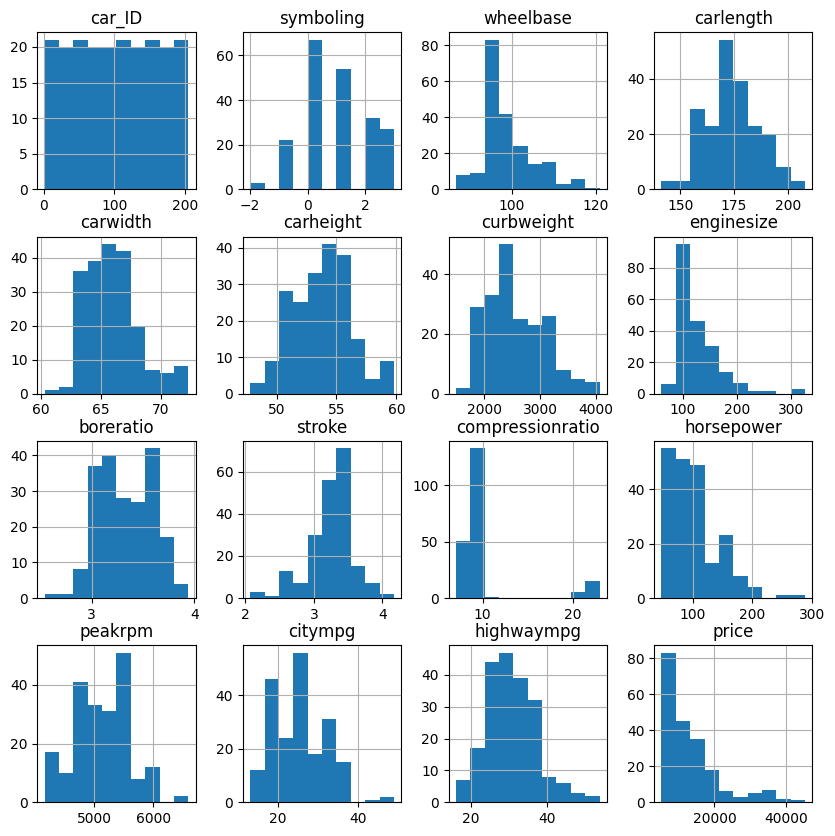

In [35]:
data.hist(figsize=(10,10))

In [36]:
data.shape

(205, 26)

# data cleaning

In [37]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [38]:
data.select_dtypes(exclude=['number']).columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [39]:
data['CarName'].value_counts().unique()

array([6, 4, 3, 2, 1])

# data preparation

In [40]:
data['CarCompany'] = data.CarName.apply(lambda x: str(x.split(' ')[0]))
data.drop('CarName', axis=1, inplace=True)
data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [41]:
data.CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [42]:
data.CarCompany.replace('maxda','mazda',inplace=True)

data.CarCompany.replace('porcshce','porsche',inplace=True)

data.CarCompany.replace('toyouta','toyota',inplace=True)

data.CarCompany.replace(['vokswagen','vw'],'volkswagen',inplace=True)

data.CarCompany.replace('Nissan', 'nissan',inplace=True)
data.CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [43]:
data.fuelsystem.replace('mfi','mpfi',inplace=True)
data.fuelsystem.unique()

array(['mpfi', '2bbl', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [44]:
data['enginesize/horsepower'] = data.enginesize/data.horsepower 

In [45]:

data['curbweight/enginesize'] = data.curbweight/data.enginesize
data['carwidth/carlength'] = data.carwidth/data.carlength
data['highwaympg/citympg'] = data.highwaympg/data.citympg
data.drop(['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'highwaympg', 'citympg', 'car_ID'], 
             axis=1, inplace=True)

data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,enginetype,...,boreratio,stroke,compressionratio,peakrpm,price,CarCompany,enginesize/horsepower,curbweight/enginesize,carwidth/carlength,highwaympg/citympg
0,3,gas,std,two,convertible,rwd,front,88.6,48.8,dohc,...,3.47,2.68,9.0,5000,13495.0,alfa-romero,1.171171,19.600000,0.379739,1.285714
1,3,gas,std,two,convertible,rwd,front,88.6,48.8,dohc,...,3.47,2.68,9.0,5000,16500.0,alfa-romero,1.171171,19.600000,0.379739,1.285714
2,1,gas,std,two,hatchback,rwd,front,94.5,52.4,ohcv,...,2.68,3.47,9.0,5000,16500.0,alfa-romero,0.987013,18.572368,0.382593,1.368421
3,2,gas,std,four,sedan,fwd,front,99.8,54.3,ohc,...,3.19,3.40,10.0,5500,13950.0,audi,1.068627,21.440367,0.374858,1.250000
4,2,gas,std,four,sedan,4wd,front,99.4,54.3,ohc,...,3.19,3.40,8.0,5500,17450.0,audi,1.182609,20.764706,0.375991,1.222222


In [46]:
data.symboling = data.symboling.map({-3: 'safe', -2: 'safe', -1: 'safe', 
                                           0: 'moderate', 1: 'moderate', 2:'risky', 3:'risky'})
data.symboling.head()

0       risky
1       risky
2    moderate
3       risky
4       risky
Name: symboling, dtype: object

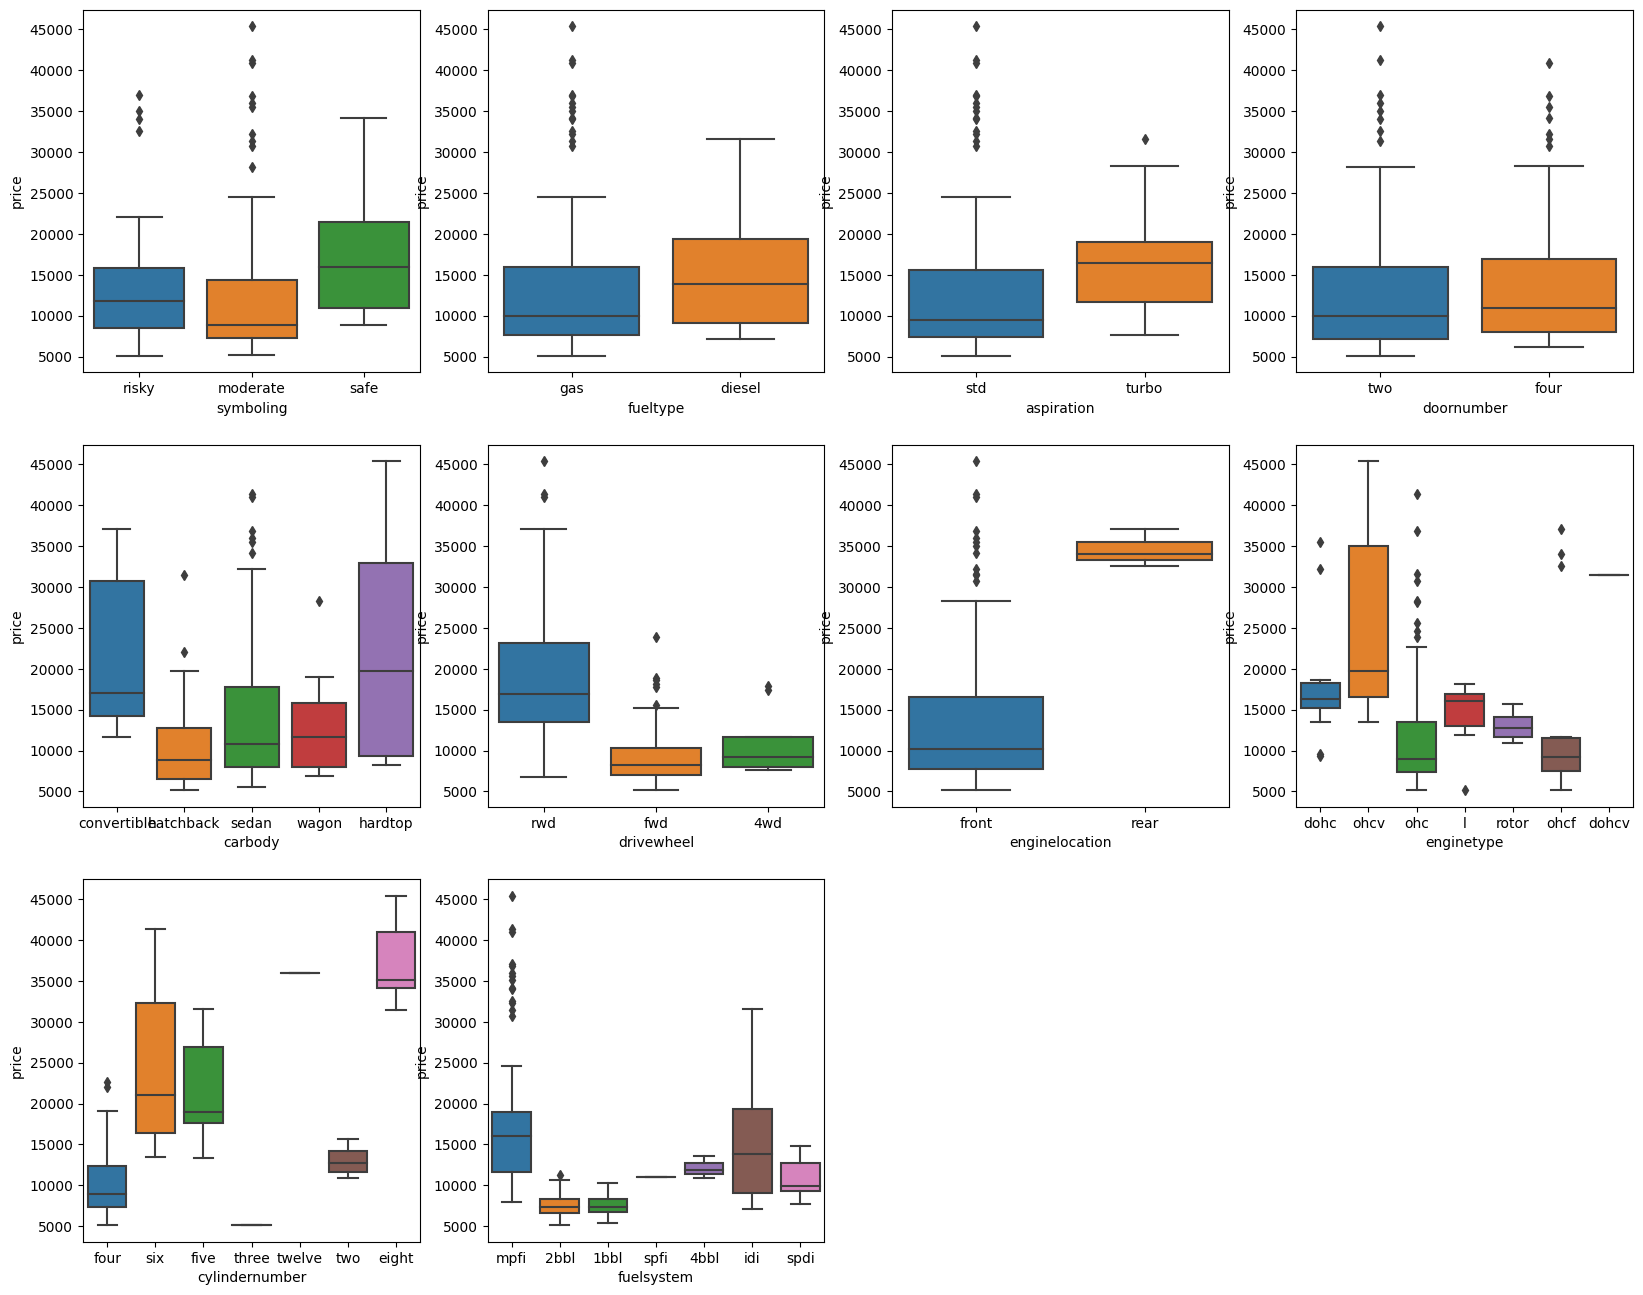

In [47]:
plt.figure(figsize=(20, 16))
plt.subplot(3,4,1)
sns.boxplot(x = 'symboling', y = 'price', data = data)
plt.subplot(3,4,2)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(3,4,3)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(3,4,4)
sns.boxplot(x = 'doornumber', y = 'price', data = data)
plt.subplot(3,4,5)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(3,4,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(3,4,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)
plt.subplot(3,4,8)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(3,4,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = data)
plt.subplot(3,4,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = data)

plt.show()

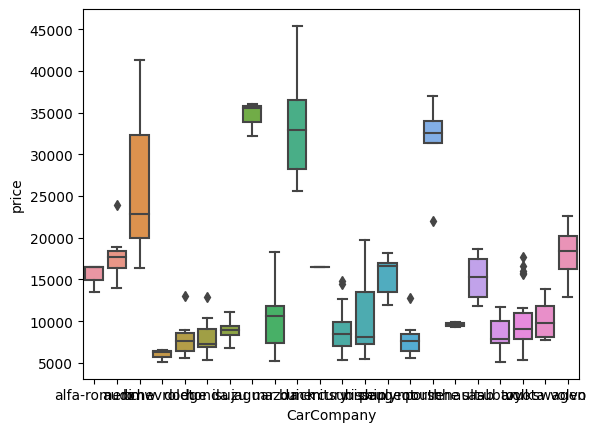

In [48]:
sns.boxplot(x = 'CarCompany', y = 'price', data = data)
plt.show()

In [49]:
company_price = dict(data.groupby('CarCompany').price.median())
company_price

{'alfa-romero': 16500.0,
 'audi': 17710.0,
 'bmw': 22835.0,
 'buick': 32892.0,
 'chevrolet': 6295.0,
 'dodge': 7609.0,
 'honda': 7295.0,
 'isuzu': 8916.5,
 'jaguar': 35550.0,
 'mazda': 10595.0,
 'mercury': 16503.0,
 'mitsubishi': 8499.0,
 'nissan': 8124.0,
 'peugeot': 16630.0,
 'plymouth': 7609.0,
 'porsche': 32528.0,
 'renault': 9595.0,
 'saab': 15275.0,
 'subaru': 7894.0,
 'toyota': 9103.0,
 'volkswagen': 9737.5,
 'volvo': 18420.0}

In [50]:
for i in company_price.keys():
    
    if company_price[i] <= 10000:
        company_price[i]='low'
        
    elif (company_price[i] > 10000) & (company_price[i] < 20000):
        company_price[i]='med'
        
    else:
        company_price[i]='high'
        
company_price

{'alfa-romero': 'med',
 'audi': 'med',
 'bmw': 'high',
 'buick': 'high',
 'chevrolet': 'low',
 'dodge': 'low',
 'honda': 'low',
 'isuzu': 'low',
 'jaguar': 'high',
 'mazda': 'med',
 'mercury': 'med',
 'mitsubishi': 'low',
 'nissan': 'low',
 'peugeot': 'med',
 'plymouth': 'low',
 'porsche': 'high',
 'renault': 'low',
 'saab': 'med',
 'subaru': 'low',
 'toyota': 'low',
 'volkswagen': 'low',
 'volvo': 'med'}

In [51]:
data.CarCompany = data.CarCompany.map(company_price)
data.CarCompany.unique()

array(['med', 'high', 'low'], dtype=object)

In [52]:
data = pd.get_dummies(data)
data.head()

,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,price,enginesize/horsepower,curbweight/enginesize,carwidth/carlength,...,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_high,CarCompany_low,CarCompany_med
0,88.6,48.8,3.47,2.68,9.0,5000,13495.0,1.171171,19.600000,0.379739,...,False,False,False,False,True,False,False,False,False,True
1,88.6,48.8,3.47,2.68,9.0,5000,16500.0,1.171171,19.600000,0.379739,...,False,False,False,False,True,False,False,False,False,True
2,94.5,52.4,2.68,3.47,9.0,5000,16500.0,0.987013,18.572368,0.382593,...,False,False,False,False,True,False,False,False,False,True
3,99.8,54.3,3.19,3.40,10.0,5500,13950.0,1.068627,21.440367,0.374858,...,False,False,False,False,True,False,False,False,False,True
4,99.4,54.3,3.19,3.40,8.0,5500,17450.0,1.182609,20.764706,0.375991,...,False,False,False,False,True,False,False,False,False,True


In [53]:
CarData_train, CarData_test = train_test_split(data, train_size = 0.7, random_state = 100)
print(CarData_train.shape)
print(CarData_test.shape)

(143, 54)
(62, 54)


#  training

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [55]:
num_vars = ['wheelbase', 'carheight', 'boreratio', 'stroke', 'compressionratio',
       'peakrpm', 'price', 'enginesize/horsepower', 'curbweight/enginesize',
       'carwidth/carlength', 'highwaympg/citympg']


CarData_train[num_vars] = scaler.fit_transform(CarData_train[num_vars])

CarData_train.head()

,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,price,enginesize/horsepower,curbweight/enginesize,carwidth/carlength,...,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_high,CarCompany_low,CarCompany_med
122,0.244828,0.265487,0.230159,0.525253,0.15000,0.551020,0.068818,0.618640,0.466438,0.382172,...,False,True,False,False,False,False,False,False,True,False
125,0.272414,0.212389,1.000000,0.464646,0.15625,0.551020,0.466890,0.337795,0.286077,0.617135,...,False,False,False,False,True,False,False,True,False,False
166,0.272414,0.424779,0.444444,0.449495,0.15000,1.000000,0.122110,0.205882,0.517098,0.361980,...,False,False,False,False,True,False,False,False,True,False
1,0.068966,0.088496,0.626984,0.247475,0.12500,0.346939,0.314446,0.421799,0.340855,0.365731,...,False,False,False,False,True,False,False,False,False,True
199,0.610345,0.858407,0.746032,0.484848,0.03125,0.387755,0.382131,0.153005,0.554230,0.122844,...,False,False,False,False,True,False,False,False,False,True


In [56]:
y_train = CarData_train.pop('price')
X_train = CarData_train

In [57]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=10)        
rfe = rfe.fit(X_train, y_train)

In [59]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carheight', False, 13),
 ('boreratio', True, 1),
 ('stroke', False, 6),
 ('compressionratio', True, 1),
 ('peakrpm', False, 4),
 ('enginesize/horsepower', False, 27),
 ('curbweight/enginesize', False, 7),
 ('carwidth/carlength', False, 22),
 ('highwaympg/citympg', False, 16),
 ('symboling_moderate', False, 35),
 ('symboling_risky', False, 34),
 ('symboling_safe', False, 21),
 ('fueltype_diesel', True, 1),
 ('fueltype_gas', False, 3),
 ('aspiration_std', False, 28),
 ('aspiration_turbo', False, 18),
 ('doornumber_four', False, 41),
 ('doornumber_two', False, 40),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 31),
 ('carbody_hatchback', False, 29),
 ('carbody_sedan', False, 30),
 ('carbody_wagon', False, 32),
 ('drivewheel_4wd', False, 43),
 ('drivewheel_fwd', False, 38),
 ('drivewheel_rwd', False, 39),
 ('enginelocation_front', False, 2),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohc', False, 23),
 ('enginetype_dohcv', False, 15),
 ('

In [60]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'boreratio', 'compressionratio', 'fueltype_diesel',
       'carbody_convertible', 'enginelocation_rear', 'cylindernumber_four',
       'cylindernumber_twelve', 'fuelsystem_idi', 'CarCompany_high'],
      dtype='object')

In [61]:
X_train_rfe = X_train[col]

In [62]:

X_train_rfe = sm.add_constant(X_train_rfe)

In [63]:
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()

In [64]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     118.8
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           3.98e-59
Time:                        21:32:53   Log-Likelihood:                 174.38
No. Observations:                 143   AIC:                            -328.8
Df Residuals:                     133   BIC:                            -299.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [65]:
X_train_new = X_train_rfe.drop(['fueltype_diesel'], axis = 1)

In [66]:
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [67]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     118.8
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           3.98e-59
Time:                        21:32:54   Log-Likelihood:                 174.38
No. Observations:                 143   AIC:                            -328.8
Df Residuals:                     133   BIC:                            -299.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [68]:
y_train_pred = lm.predict(X_train_lm)

# testing 

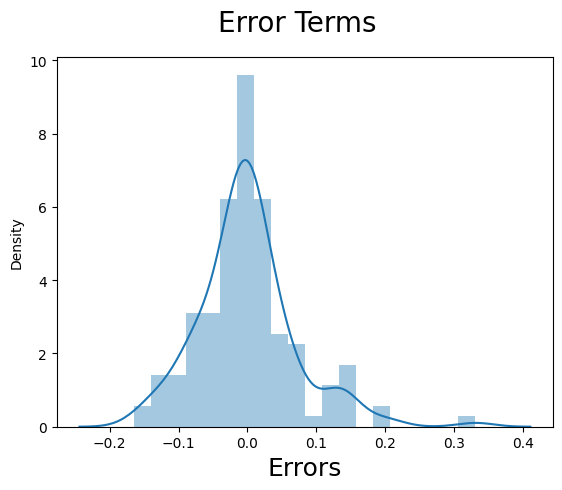

In [69]:
import warnings
warnings.filterwarnings("ignore")
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

In [70]:
num_vars = ['wheelbase', 'carheight', 'boreratio', 'stroke', 'compressionratio',
       'peakrpm', 'price', 'enginesize/horsepower', 'curbweight/enginesize',
       'carwidth/carlength', 'highwaympg/citympg']


CarData_test[num_vars] = scaler.transform(CarData_test[num_vars])

CarData_test.head()

,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,price,enginesize/horsepower,curbweight/enginesize,carwidth/carlength,...,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_high,CarCompany_low,CarCompany_med
160,0.313793,0.460177,0.404762,0.424242,0.12500,0.265306,0.072382,0.588621,0.421355,0.442376,...,False,True,False,False,False,False,False,False,True,False
186,0.368966,0.699115,0.404762,0.611111,0.12500,0.448980,0.093295,0.502853,0.398772,0.383482,...,False,False,False,False,True,False,False,False,True,False
59,0.420690,0.522124,0.563492,0.606061,0.10000,0.265306,0.102964,0.626808,0.338541,0.307337,...,False,True,False,False,False,False,False,False,False,True
165,0.272414,0.424779,0.444444,0.449495,0.15000,1.000000,0.115479,0.205882,0.500831,0.361980,...,False,False,False,False,True,False,False,False,True,False
140,0.231034,0.699115,0.746032,0.227273,0.10625,0.102041,0.068652,0.646544,0.392814,0.629511,...,False,True,False,False,False,False,False,False,True,False


In [71]:
y_test = CarData_test.pop('price')
X_test = CarData_test

In [72]:
X_test = X_test[col]
X_test_new = X_test.drop(['compressionratio', 'fuelsystem_idi', 'fueltype_diesel'], axis=1)

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new.shape

(62, 8)

In [73]:
y_pred = lm.predict(X_test)

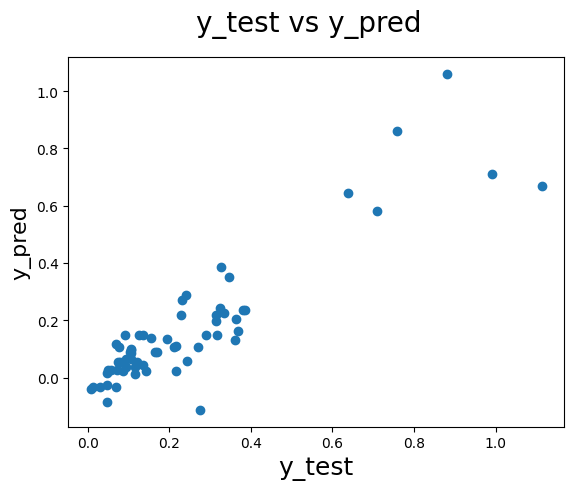

In [74]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

In [75]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_pred)

0.7016788902977462